In [1]:
import os
import sys
sys.path.append('../')
sys.path.append('../datasets')
sys.path.append('../models')
import torch
import torchvision
import torch.backends.cudnn as cudnn
import random
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from importlib import reload
from datasets.three_dim_shapes import ThreeDimShapesDataset
from datasets.small_norb import SmallNORBDataset
from datasets.seq_mnist import SequentialMNIST
from datasets.seq_mnist import SequentialMNIST_double
from datasets import seq_mnist as sm

import models.seqae as seqae
import models.base_networks as bn 
import models
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from einops import rearrange
from sklearn.metrics import r2_score
import pdb
from einops import rearrange
from utils import notebook_utils as nb
from utils import evaluations as ev



import copy

import csv
import ast
from source import yaml_utils as yu


from tqdm import tqdm

if torch.cuda.is_available():
    device = torch.device('cuda')
    cudnn.deterministic = True
    cudnn.benchmark = True
else:
    device = torch.device('cpu')
    gpu_index = -1

    
from utils import yaml_utils as yu
import yaml
rootpath = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/'
result_dir = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result'
jobdir = '/mnt/vol21/masomatics/ULASclone/jobs'

mode = 'so3'
dat_root = f"""/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/{mode}"""

playground_path = os.path.join(result_dir, '20220913_playground_model')


print(os.path.exists(playground_path))

print(nb.filter_list('double', os.listdir(result_dir)))
#1116
#targpath = os.path.join(result_dir, '20221116_mnist_double_0')

#1117
targpath = os.path.join(result_dir, '20221122_double_translation_0')
#targpath = os.path.join(result_dir, '20221117_mnist_double_two_0')



print(os.path.exists(targpath))
print(os.listdir(targpath))

True
['20221031_double_mnist_two_0', '20221117_mnist_double_0', '20221117_mnist_double_two_0', '20221104_mnist_double_0', '20221103_mnist_double_0', '20221122_double_translation_0', '20221116_mnist_double_0', '20221101_mnist_double_0', '20221031_double_mnist_0', '20221101_mnist_double_two_0']
True
['dim_m128_dim_a16', 'dim_m128_dim_a8', 'dim_m64_dim_a8', 'dim_m64_dim_a16', 'dim_m256_dim_a8', 'dim_m256_dim_a16']


In [2]:
reload(nb)
alltarglist = os.listdir(targpath)

alltarglist = nb.model_exists(alltarglist,  targpath)

#1116, 1117
targlist = nb.filter_queries(query_list=['dim_m256'] , mylist=alltarglist)

#1117
#targlist = nb.filter_queries(query_list=['pair_transitionTrue'] , mylist=alltarglist)

print(targlist)






['dim_m256_dim_a8', 'dim_m256_dim_a16']


In [21]:
reload(ev)
reload(sm)
results = {} 
inferred_Ms = {} 
model_configs = {}
models = {}
tp = 7
n_cond = 2
device =0
predictive = False
reconstructive = False
repeats=3


targdir_pathlist = [os.path.join(targpath, targdir) for targdir in targlist] 

#targdir_pathlist = ['/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221116_mnist_double_0/pair_transitionFalse_dim_m256_dim_a8']
#targdir_pathlist = []
#targdir_pathlist.append(playground_path)

print(targdir_pathlist)

reload(ev)
reload(bn)
allresults, targ, xnext = ev.prediction_evaluation(targdir_pathlist, device=0,
                                                                        n_cond=2,
                                                                        tp=tp,
                                                                    repeats=1,
                           predictive= False , reconstructive = False)

results = allresults['results']




['/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221122_double_translation_0/dim_m256_dim_a8', '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221122_double_translation_0/dim_m256_dim_a16']
{'args': {'T': 9, 'backgrnd': False, 'fixpos': False, 'max_T': 9, 'max_angle_velocity_ratio': [-0.5, 0.5], 'max_color_velocity_ratio': [-0.5, 0.5], 'only_use_digit4': True, 'pair_transition': True, 'root': '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/MNIST', 'same_object': True, 'train': True}, 'fn': './datasets/seq_mnist.py', 'name': 'SequentialMNIST_double'}
/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221122_double_translation_0/dim_m256_dim_a8 
 snapshot_model_iter_50000


100%|██████████| 183/183 [00:16<00:00, 11.29it/s]


tensor([ 0.3841,  4.0193, 10.1597, 15.2779, 19.0531, 21.9114, 24.3039])
{'args': {'T': 9, 'backgrnd': False, 'fixpos': False, 'max_T': 9, 'max_angle_velocity_ratio': [-0.5, 0.5], 'max_color_velocity_ratio': [-0.5, 0.5], 'only_use_digit4': True, 'pair_transition': True, 'root': '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/MNIST', 'same_object': True, 'train': True}, 'fn': './datasets/seq_mnist.py', 'name': 'SequentialMNIST_double'}
/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221122_double_translation_0/dim_m256_dim_a16 
 snapshot_model_iter_50000


100%|██████████| 183/183 [00:15<00:00, 11.69it/s]

tensor([ 0.3829,  3.7340,  9.6229, 14.8857, 18.4744, 21.2240, 23.3269])


In [24]:
mode = list(results.keys())[1]
print(mode)
print(len(targ))

/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221122_double_translation_0/dim_m256_dim_a16
18


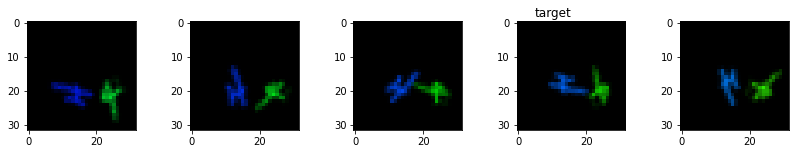

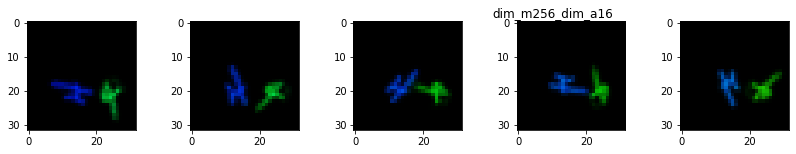

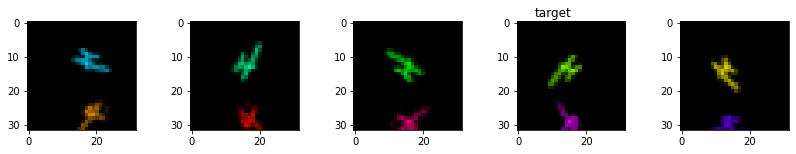

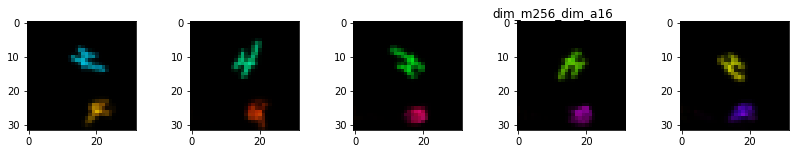

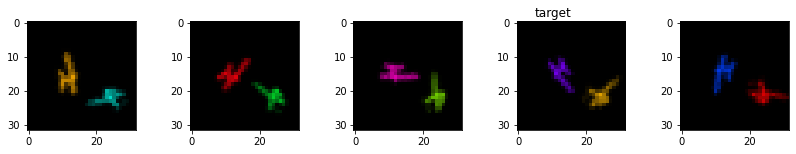

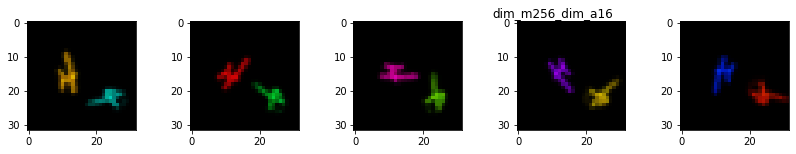

In [31]:
device = 0
shift = 15
reload(sm)
for idx in list(range(0+shift, 3+shift)):
    figsize = (20,2)


    plt.figure(figsize = figsize)
    for k in range(tp-n_cond):
        tn = torch.permute(targ[idx][k+n_cond], (1,2,0))
        plt.subplot(1, tp, k+1)
        plt.imshow(tn, interpolation=None)
    plt.suptitle("target")  

#     for mode in list(allresults['models'].keys()):
    plt.figure(figsize = figsize)
    xnext, M = ev.predict(targ, allresults['models'][mode].to(device),
                n_cond=2, tp=tp, device=device, swap =False,
                predictive=False, reconstructive=False)
    xnext = xnext.to('cpu')
    M = M.to('cpu')
    for k in range(tp-n_cond):
        xn = torch.permute(xnext[idx][k], (1,2,0))
        plt.subplot(1, tp, k+1)
        plt.imshow(xn, interpolation=None)
    plt.suptitle(mode.split('/')[-1])    



# THERE SEEMS TO BE NO TRANSLTATION HERE, what's happening?

In [32]:
from utils import optimize_bd_cob as obc 
reload(obc)
Ms = allresults['Ms'][mode]
normalize=False
ChangeB= obc.optimize_bd_cob(Ms,  lr=0.1, epochs_monitor=20, n_epochs=300, normalize=True) 

ep:19 loss:9.76981891487119
ep:39 loss:9.764285210345307
ep:59 loss:9.760595683078577
ep:79 loss:9.759843100835427
ep:99 loss:9.758914784918252
ep:119 loss:9.757618219466375
ep:139 loss:9.756667900150747
ep:159 loss:9.755930927019339
ep:179 loss:9.755695679954208
ep:199 loss:9.755454772876085
ep:219 loss:9.754912440722139
ep:239 loss:9.755363617478801
ep:259 loss:9.75432749228786
ep:279 loss:9.754251710277272
ep:299 loss:9.753998190276796


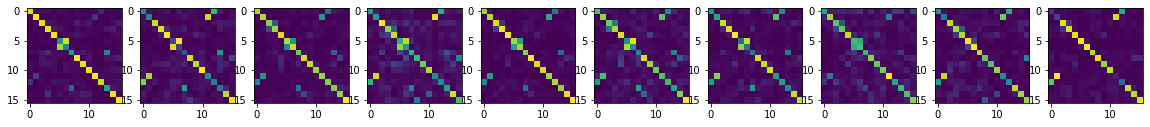

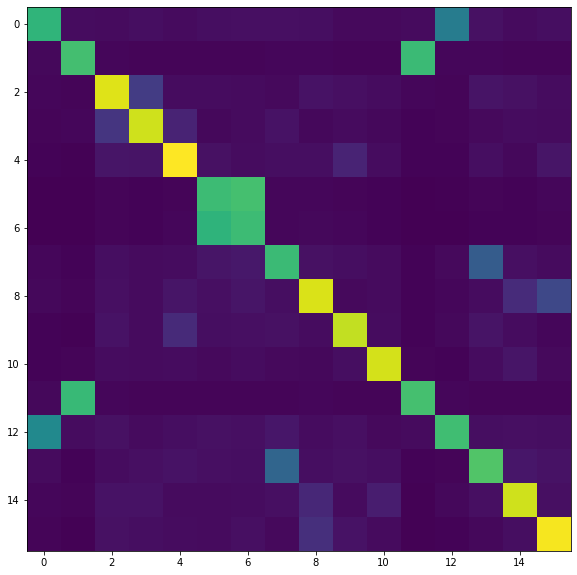

In [33]:
PMPs = ChangeB(Ms)
plt.figure(figsize=(20, 20))
for k in range(10):
    plt.subplot(1, 10, k+1)
    plt.imshow(torch.abs(PMPs[k]).detach().to('cpu'))
    
plt.figure(figsize=(10, 10))
plt.imshow(torch.mean(torch.abs(PMPs.detach()), axis=0))




In [49]:
reload(obc)
selections = obc.obtain_blocks(torch.mean(torch.abs(PMPs.detach()), axis=0), threshconst=0.2)
print(selections)

14 2 2
12 2 4
10 2 6
9 1 7
7 2 9
5 2 11
3 2 13
2 1 14
1 1 15
0 1 16
[[0, 12], [1, 11], [2, 3], [4], [5, 6], [7, 13], [8, 15], [9], [10], [14]]


# Obtain pair of sequences moving only one obj


/tmp/ipykernel_4770/854296194.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(datseq1[k]).permute([1, 2, 0]))
/tmp/ipykernel_4770/854296194.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(datseq2[k]).permute([1, 2, 0]))


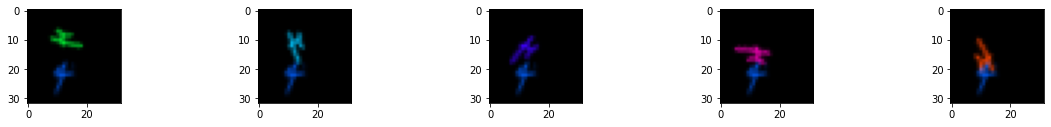

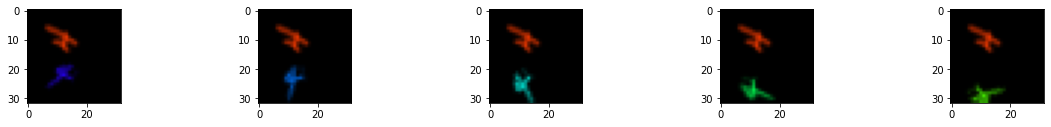

In [35]:
from utils import optimize_lasso as ol 
import einops
reload(ol)
datseqs1, datseqs2 = ol.obtain_pair_sequences(mode, size=30, T=5)



idd = 2
datseq1= datseqs1[idd]
datseq2= datseqs2[idd]


plt.figure(figsize=(20,10))
for k in range(len(datseq1)):
    plt.subplot(5, len(datseq1),  k+1)
    plt.imshow(torch.tensor(datseq1[k]).permute([1, 2, 0])) 

plt.figure(figsize=(20,10))
for k in range(len(datseq2)):
    plt.subplot(5, len(datseq2),  k+1)
    plt.imshow(torch.tensor(datseq2[k]).permute([1, 2, 0])) 

# Encode the sequences by Model 

In [36]:
checkmodel = allresults['models'][mode].to('cpu')


encoded = checkmodel.encode(datseqs1).detach()
encoded_two = checkmodel.encode(datseqs2).detach()
print(datseqs1.shape)
print(datseqs2.shape)

print(encoded.shape)
print(encoded_two.shape)

encodedP = (encoded.to('cpu') @ ChangeB.U).detach()

encoded_twoP = (encoded_two.to('cpu') @ ChangeB.U).detach()




torch.Size([30, 5, 3, 32, 32])
torch.Size([30, 5, 3, 32, 32])
torch.Size([30, 5, 256, 16])
torch.Size([30, 5, 256, 16])


/tmp/ipykernel_4770/726045640.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, np.ceil(len(selections)/2), k)


torch.Size([240, 256])
torch.Size([240, 256])
torch.Size([120, 256])
torch.Size([120, 256])
torch.Size([120, 256])
torch.Size([240, 256])
torch.Size([240, 256])
torch.Size([120, 256])
torch.Size([120, 256])
torch.Size([120, 256])
torch.Size([120, 256])
torch.Size([120, 256])


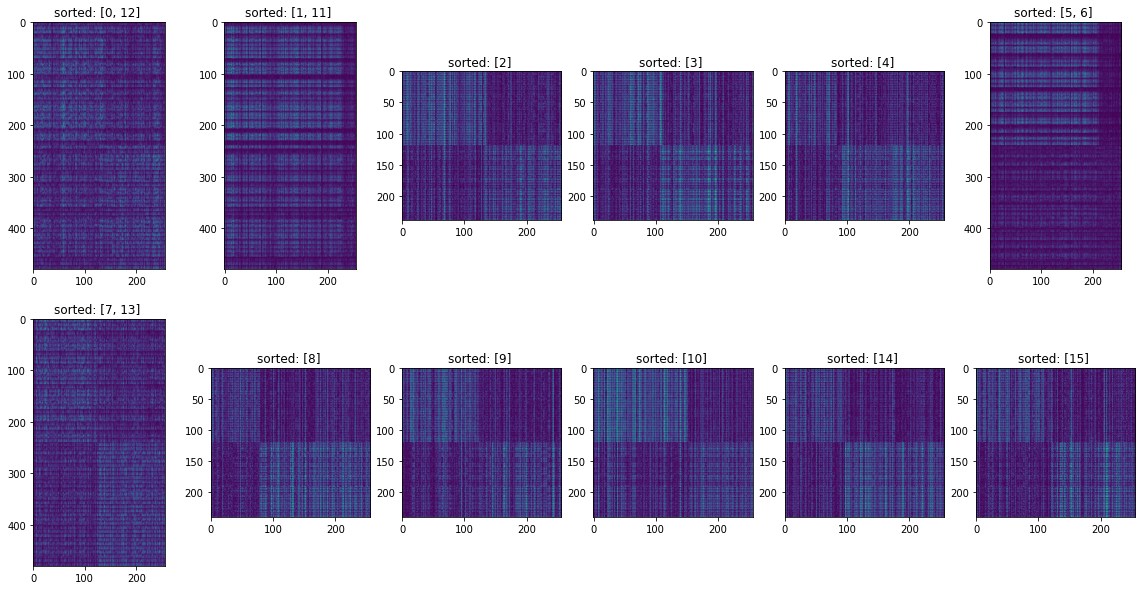

In [37]:

# k=1
# selection = selections[k]

chosen_selections = [] 
partitions = []
onewins = []
twowins = [] 

plt.figure(figsize=(20,10))
k=0
for selection in selections:

    k = k+1
    plt.subplot(2, np.ceil(len(selections)/2), k)
    
    delta_one_list = []
    delta_two_list = [] 
    for b in range(len(encodedP)):


        encodedU = encodedP[b, :, :, selection]
        encoded_twoU = encoded_twoP[b, :, :, selection]
        deltaU = encodedU[1:] - encodedU[0]
        deltaU = einops.rearrange(deltaU, 't s a -> (t a) s')
        delta_twoU = encoded_twoU[1:] - encoded_twoU[0]
        delta_twoU = einops.rearrange(delta_twoU, 't s a -> (t a) s')

        delta_one_list.append(deltaU)
        delta_two_list.append(delta_twoU)

    #Shall be [b x (T-1) x (dimI)]  x dimS
    delta_one = torch.cat(delta_one_list)
    delta_two = torch.cat(delta_two_list)
    print(delta_one.shape)


    
    #sort
    delta_sort, delta_two_sort, (onewin, twowin) = ol.sort_pair_col(delta_one, delta_two)
    plt.imshow(torch.cat([torch.abs(delta_sort.detach().to('cpu')),  torch.abs(delta_two_sort.detach().to('cpu'))]  ))
    plt.title(f"""sorted: {selection} """)
    #Record
    chosen_selections.append(selection)
    partitions.append([onewin] + [twowin] )
    onewins.append(onewin)
    twowins.append(twowin)



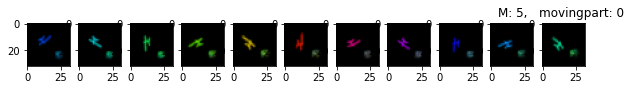

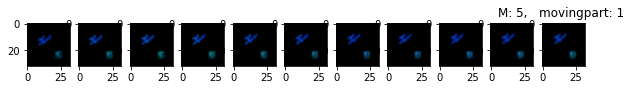

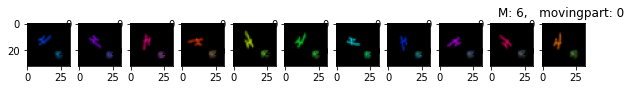

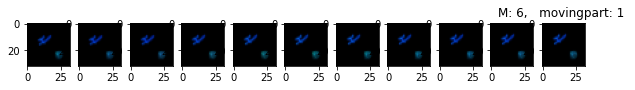

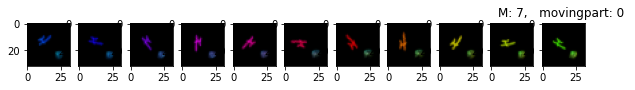

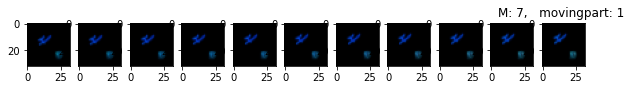

In [106]:
initial_idx = 0
#len(partitions[check][0]), len(partitions[check][1])
reload(ol)
HP = encodedP[initial_idx][0]
H = encoded[initial_idx][0]
T = 10
dim1treatment=False


midx_shift=0
for k in range(5+midx_shift, 8+midx_shift):
    PMP = PMPs[k]

    for part_idx in [0, 1]:
    #part_idx = 0

        Hs_movedP = ol.move_partial(chosen_selections, HP, PMP, partitions, part_idx, T=T, dim1treatment=dim1treatment)
        Hs_moved = Hs_movedP @ torch.linalg.inv(ChangeB.U).detach()
        decoded0 = checkmodel.decode(Hs_moved.unsqueeze(0))[0].permute([0,2,3,1]).detach()
        plt.figure(figsize=(10,10))
        for t in range(len(Hs_moved)):
            plt.subplot(1, len(Hs_moved), t+1)
            plt.imshow(torch.sigmoid(decoded0[t]))
        plt.title(f"""M: {k},   movingpart: {part_idx} """)

#     part_idx = 1
#     Hs_movedP = ol.move_partial(chosen_selections, H, M, partitions, part_idx, T=T, dim1treatment=dim1treatment)
#     Hs_moved = Hs_movedP @ torch.linalg.inv(ChangeB.U).detach()
#     decoded0 = checkmodel.decode(Hs_moved.unsqueeze(0))[0].permute([0,2,3,1]).detach()
#     plt.figure(figsize=(10,10))
#     for t in range(len(Hs_moved)):
#         plt.subplot(1, len(Hs_moved), t+1)
#         plt.imshow(torch.sigmoid(decoded0[t]))
#     plt.title(f"""M: {k},   movingpart: {part_idx} """)

# Debug

/tmp/ipykernel_4770/1661776372.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(placeholder)


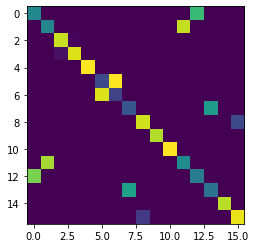

In [96]:
M =  allresults['Ms'][mode].to('cpu')[1]
PMP = PMPs[1]
def clean_mask(mat, selections):
    placeholder= torch.zeros(mat.shape)
    for selection in selections:
        M_select = mat[selection, :][:, selection]
        placeholder = assign(placeholder, M_select, selection, selection)
    return torch.tensor(placeholder)

plt.imshow(torch.abs(clean_mask(PMP.detach(), selections)))


In [99]:
def assign(mat, submat, rows, cols):
    for k in range(len(submat)):
        mat[rows[k]][cols]  = submat[k]
    return mat


def one_step(H, M, selections):
    Hcopy = copy.deepcopy(H.detach())

    for k in range(len(selections)):
        selection = selections[k]
        part= list(range(Hcopy.shape[0]))
        Hpart = Hcopy[part]    #H: part, a

        #isolate the frequency
        H_select = Hpart[:, selection]    #H : part, select
        M_select = M[selection, :][:, selection]   #M : select, select
        
        print(H_select.shape, M_select.shape)

        #apply the difference in frequency
        H_alter = H_select @ M_select     #H : part, select

        Hcopy = assign(Hcopy, H_alter, part, selection)
    return Hcopy

HMP_one = one_step(HP, PMP, selections)
HMP_one_clean = one_step(HP, clean_mask(PMP.detach(), selections), selections)

torch.Size([256, 2]) torch.Size([2, 2])
torch.Size([256, 2]) torch.Size([2, 2])
torch.Size([256, 2]) torch.Size([2, 2])
torch.Size([256, 1]) torch.Size([1, 1])
torch.Size([256, 2]) torch.Size([2, 2])
torch.Size([256, 2]) torch.Size([2, 2])
torch.Size([256, 2]) torch.Size([2, 2])
torch.Size([256, 1]) torch.Size([1, 1])
torch.Size([256, 1]) torch.Size([1, 1])
torch.Size([256, 1]) torch.Size([1, 1])
torch.Size([256, 2]) torch.Size([2, 2])
torch.Size([256, 2]) torch.Size([2, 2])
torch.Size([256, 2]) torch.Size([2, 2])
torch.Size([256, 1]) torch.Size([1, 1])
torch.Size([256, 2]) torch.Size([2, 2])
torch.Size([256, 2]) torch.Size([2, 2])
torch.Size([256, 2]) torch.Size([2, 2])
torch.Size([256, 1]) torch.Size([1, 1])
torch.Size([256, 1]) torch.Size([1, 1])
torch.Size([256, 1]) torch.Size([1, 1])


/tmp/ipykernel_4770/1661776372.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(placeholder)


In [100]:
HMP_clean = HP @ clean_mask(PMP.detach(), selections)
HMP_clean == HMP_one_clean

/tmp/ipykernel_4770/1661776372.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(placeholder)


tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [101]:
reload(ol)
HMP_clean2 = ol.move_partial_onestep(selections, HP, clean_mask(PMP.detach(), selections), None, 0 )
torch.sum(HMP_clean2 == HMP_clean) / torch.prod(torch.tensor(H.shape))

/tmp/ipykernel_4770/1661776372.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(placeholder)


tensor(1.)

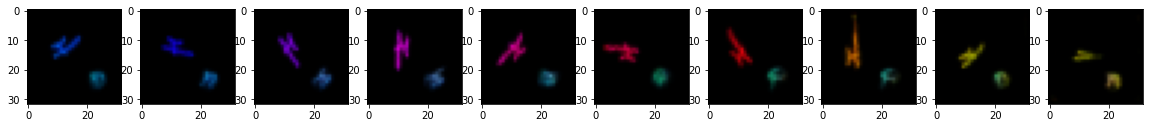

In [104]:
# The result of applying just M  : this does not seem like this is working

reload(ol)
HPs_default = ol.repeat_apply(HP, PMP, T=T)
HPs_default = HPs_default @ torch.linalg.inv(ChangeB.U).detach()


decoded_default = torch.sigmoid(checkmodel.decode(HPs_default.unsqueeze(0))[0])


plt.figure(figsize=(20,10))
for t in range(T):
    plt.subplot(1, T, t+1)
    plt.imshow(decoded_default[t].detach().permute([1,2,0]))

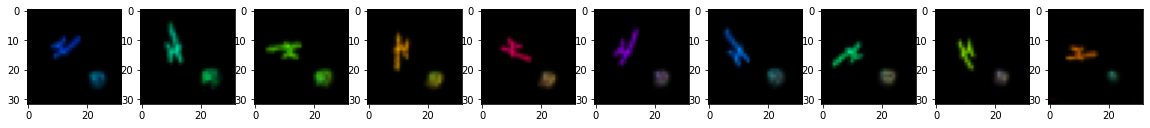

In [105]:
# The result of applying just M  : this does not seem like this is working

reload(ol)
Hs_default = ol.repeat_apply(H, M, T=T).detach()

decoded_default_raw = torch.sigmoid(checkmodel.decode(Hs_default.unsqueeze(0))[0])


plt.figure(figsize=(20,10))
for t in range(T):
    plt.subplot(1, T, t+1)
    plt.imshow(decoded_default_raw[t].detach().permute([1,2,0]))

In [68]:
'''
See what is happening at evaluation, see if it is the equivariance that is failing

Use targ as the gunea pig
'''
print(targ.shape)
images = targ
images_cond = images[:, :n_cond]
Mevs = checkmodel.get_M(images_cond)
print(Mevs.shape)

checkid = 10
moveid = 10


torch.Size([18, 7, 3, 32, 32])
torch.Size([18, 16, 16])


In [69]:
enc_ev = checkmodel.encode(images_cond[:, [0]])[:, 0].detach()[checkid]
Mev = Mevs[moveid]
Hev = ol.repeat_apply(enc_ev, Mev, T=10).unsqueeze(0)
print(Hev.shape)
dec_dev = torch.sigmoid(checkmodel.decode(Hev))
print(dec_dev.shape)

torch.Size([1, 11, 256, 16])
torch.Size([1, 11, 3, 32, 32])


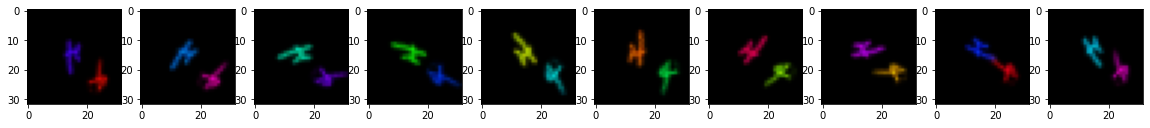

In [70]:
dec_dev_seq = (dec_dev[0]).detach()



plt.figure(figsize=(20,10))
for t in range(T):
    plt.subplot(1, T, t+1)
    plt.imshow(dec_dev_seq[t].permute([1,2,0]))

In [71]:
# swapped version  : swap seems to be working

moveid2 = 1

t, n, s, a = Hev.shape

Mev_swap = Mevs[moveid2]
Hev_swap = ol.repeat_apply(enc_ev, Mev_swap, T=10).unsqueeze(0)
print(Hev_swap.shape)
dec_dev_swap = torch.sigmoid(checkmodel.decode(Hev_swap))
print(dec_dev_swap.shape)

torch.Size([1, 11, 256, 16])
torch.Size([1, 11, 3, 32, 32])


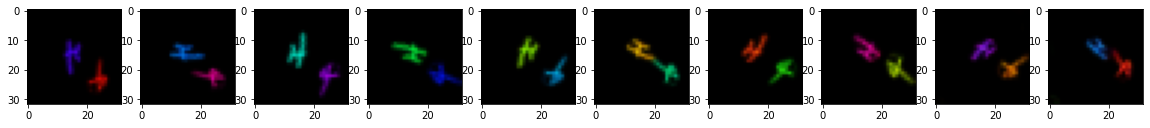

In [72]:
dec_dev_swap_seq = (dec_dev_swap[0]).detach()

plt.figure(figsize=(20,10))
for t in range(T):
    plt.subplot(1, T, t+1)
    plt.imshow(dec_dev_swap_seq[t].permute([1,2,0]))

torch.Size([1, 11, 256, 16])
torch.Size([1, 11, 3, 32, 32])


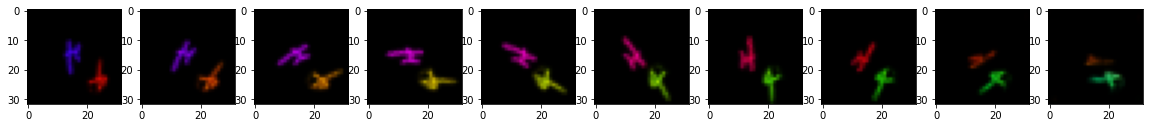

In [74]:
moveid3= 250

Ms_result = allresults['Ms'][mode].to('cpu')
Mfrom_results = Ms_result[moveid3]

Hev_res = ol.repeat_apply(enc_ev, Mfrom_results, T=10).unsqueeze(0)
print(Hev_res.shape)
dec_dev_res = torch.sigmoid(checkmodel.decode(Hev_res))
print(dec_dev_res.shape)

dec_dev_res_seq = (dec_dev_res[0]).detach()

plt.figure(figsize=(20,10))
for t in range(T):
    plt.subplot(1, T, t+1)
    plt.imshow(dec_dev_res_seq[t].permute([1,2,0]))

In [75]:
Ms_result.shape

torch.Size([5842, 16, 16])

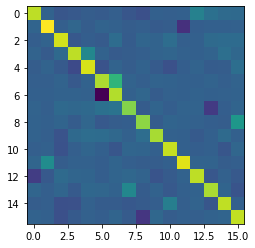

In [76]:
PMP_result = ChangeB(Ms_result).detach()

plt.imshow(PMP_result[moveid3])

In [77]:
dataconfig = allresults['configs'][mode]['train_data']['args']

data_result = sm.SequentialMNIST_double(align_initial=True, **dataconfig)
#data_result = yu.load_component(dataconfig)

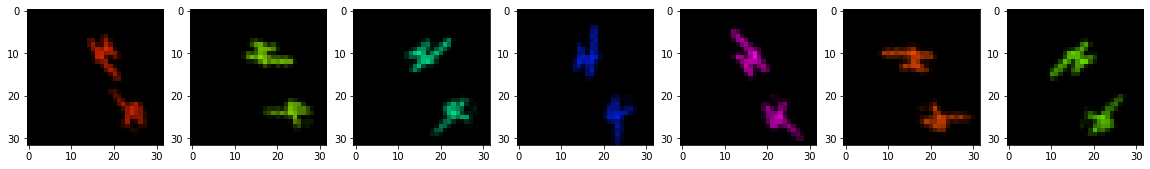

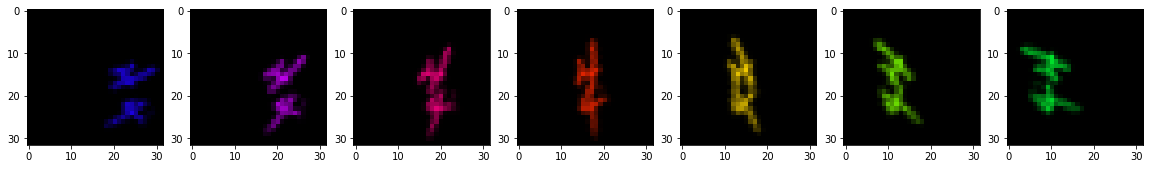

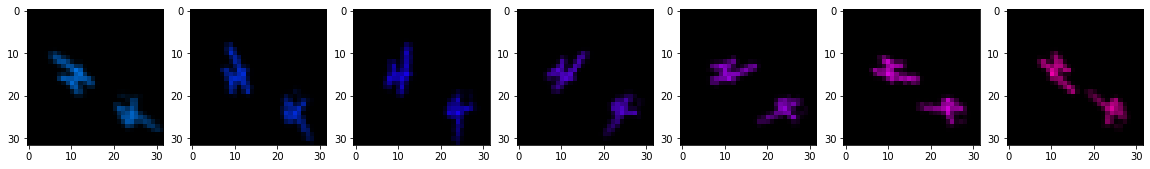

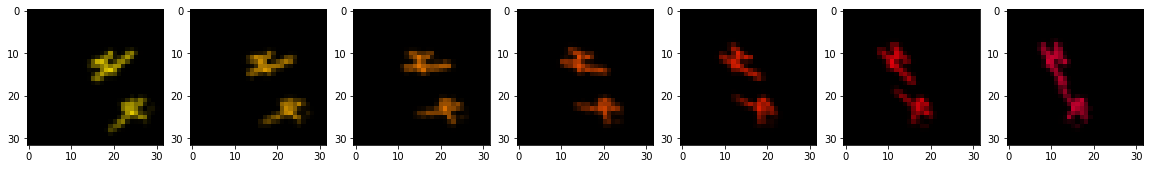

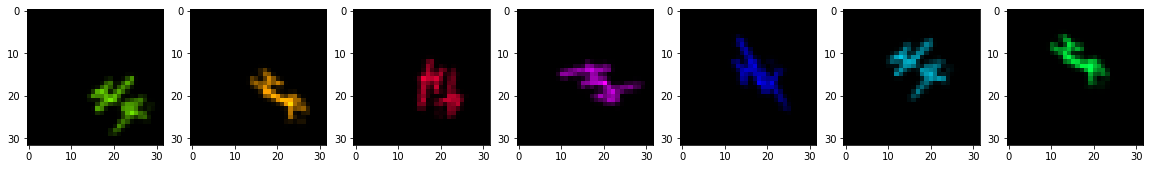

In [79]:
size = 5
for j in range(size):
    plt.figure(figsize=(20, 20))
    datseq = data_result[j]
    for k in range(tp):
        plt.subplot(size, 7,  k+1)
        plt.imshow(torch.tensor(datseq[k]).permute([1, 2, 0])) 

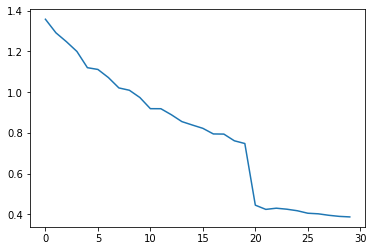

In [87]:
plt.plot(nb.read_history(mode)['train/loss'][20:])